## Exploratory Data Analysis

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Load Data

In [6]:
df = pd.read_csv('../data/clean/stats_salaries.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TO,PF,PTS,PLUS_MINUS,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
0,1630162,Anthony Edwards,F,36:22,4.0,10.0,0.400,3.0,8.0,0.375,...,1.0,1.0,15.0,5.0,MIN,Minnesota Timberwolves,2022-03-12,2021,1,10245480
1,1630162,Anthony Edwards,F,34:27,9.0,19.0,0.474,4.0,11.0,0.364,...,0.0,3.0,25.0,-3.0,MIN,Minnesota Timberwolves,2022-03-11,2021,0,10245480
2,1630162,Anthony Edwards,F,25:29,7.0,15.0,0.467,2.0,8.0,0.250,...,4.0,2.0,16.0,7.0,MIN,Minnesota Timberwolves,2022-03-09,2021,1,10245480
3,1630162,Anthony Edwards,F,32:22,7.0,13.0,0.538,1.0,5.0,0.200,...,4.0,5.0,17.0,7.0,MIN,Minnesota Timberwolves,2022-02-28,2021,1,10245480
4,1630162,Anthony Edwards,F,37:46,5.0,13.0,0.385,1.0,6.0,0.167,...,2.0,3.0,15.0,-21.0,MIN,Minnesota Timberwolves,2022-02-25,2021,0,10245480


### Pearson correlation

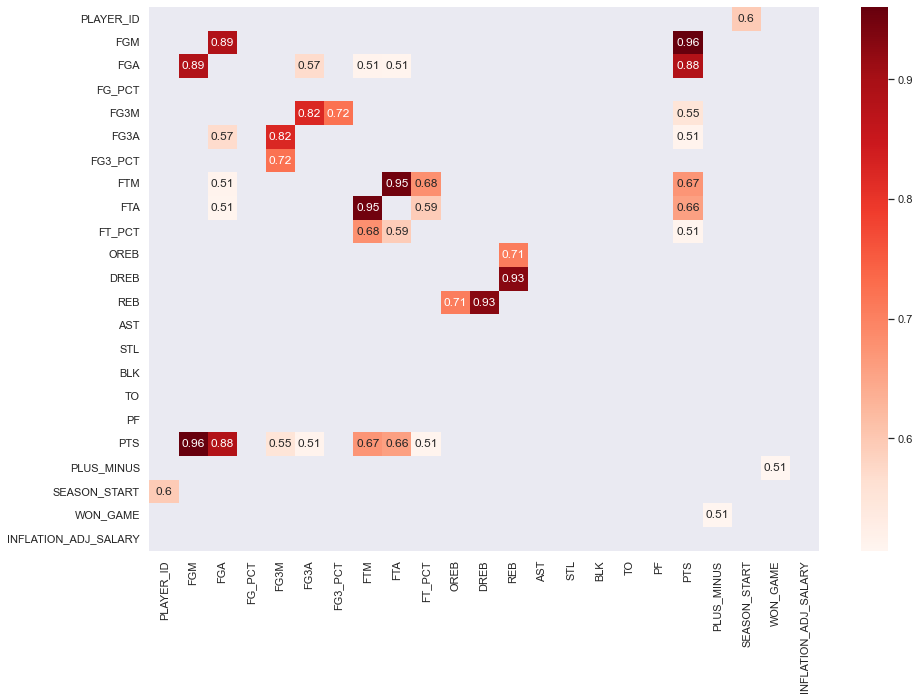

In [48]:
corr_df = df.corr()
filtered_df = corr_df[((corr_df >= .5) | (corr_df <= -.5)) & (corr_df != 1.000)]
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_df, annot=True, cmap="Reds")
plt.show() # shows all correlations above 0.5

### Spearman correlation

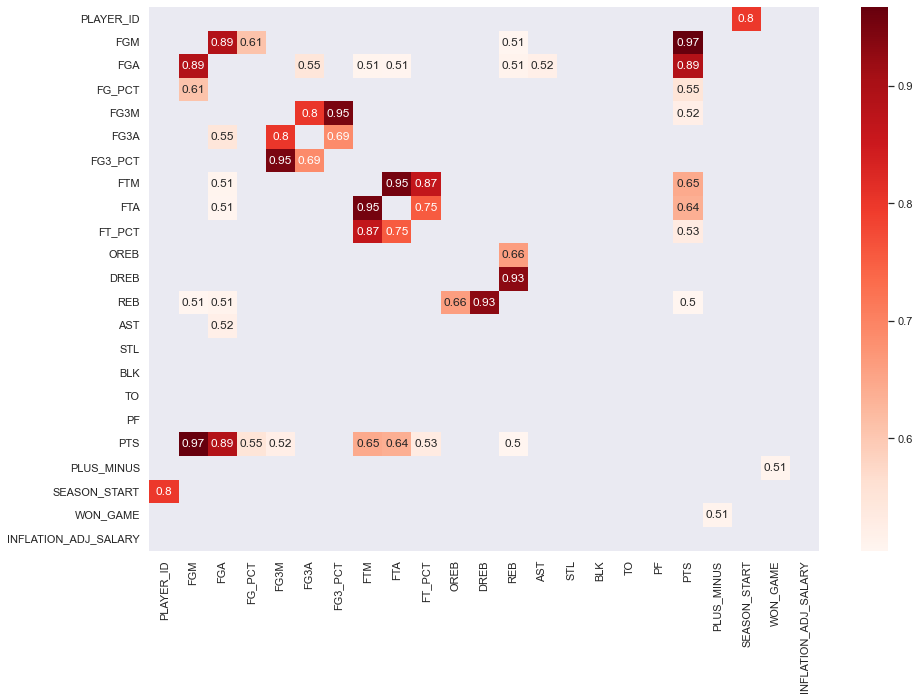

In [49]:
corr_df = df.corr(method='spearman')
filtered_df = corr_df[((corr_df >= .5) | (corr_df <= -.5)) & (corr_df != 1.000)]
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_df, annot=True, cmap="Reds")
plt.show()  # shows all correlations above 0.5

### Chi Square Test

In [37]:
pts_mean = df['PTS'].mean()
salary_mean = df.groupby(['PLAYER_ID', 'SEASON_START']).first()['INFLATION_ADJ_SALARY'].mean()
pts_mean, salary_mean

(9.870145354978144, 6096173.471252328)

In [38]:
underless, overless = df[df['PTS'] <= pts_mean].groupby(df['INFLATION_ADJ_SALARY'] < salary_mean).size()
undergreater, overgreater = df[df['PTS'] >= pts_mean].groupby(df['INFLATION_ADJ_SALARY'] > salary_mean).size()
table = [[underless, overless],[undergreater, overgreater]]
print(table[0])
print(table[1])

[71879, 202030]
[96909, 121494]


In [39]:
chi2, p, dof, _ = stats.chi2_contingency(table)

We see that the null hypothesis (that the points and salary are independent) is rejected:

In [40]:
chi2, p

(17726.359377991277, 0.0)

### Exploring Outliers

In [29]:
df.drop(columns=['START_POSITION', 'TEAM_ABBREVIATION', 'TEAM_NAME']).agg([min, max])

,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
min,15,AJ Hammons,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.0,2003-10-28,2003,0,10549
max,1630267,Zylan Cheatham,9:60,28.0,50.0,1.0,14.0,24.0,1.0,26.0,39.0,1.0,18.0,25.0,31.0,25.0,10.0,12.0,12.0,6.0,81.0,57.0,2022-03-12,2021,1,45780966


This data looks about right - no columns are below 0, and all the max values look correct as well (e.g., 81 PTS for Kobe Bryant's 81-point game from January 2006). It seems pretty safe to assume that there is no "wrong" data, since we already cleaned it. We will take a closer look at the players that did not play:

In [30]:
df.loc[df['MIN'] == '0:00']

,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
38182,1626246,Boban Marjanovic,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DAL,Dallas Mavericks,2019-12-16,2019,1,3712519
38193,1626246,Boban Marjanovic,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DAL,Dallas Mavericks,2020-02-07,2019,0,3712519
40465,202683,Enes Kanter,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BOS,Boston Celtics,2020-09-15,2019,0,5056452
46265,2199,Tyson Chandler,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HOU,Houston Rockets,2020-08-29,2019,1,2720484
50012,1629713,Justin James,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,SAC,Sacramento Kings,2019-12-26,2019,0,952855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487757,1626199,Darrun Hilliard,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAS,San Antonio Spurs,2017-10-13,2017,1,85683
487846,1627883,Jalen Jones,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DAL,Dallas Mavericks,2018-02-05,2017,0,85683
488375,203928,Cory Jefferson,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PHX,Phoenix Suns,2015-12-07,2015,1,413146
488386,203928,Cory Jefferson,NaN,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,PHX,Phoenix Suns,2015-12-06,2015,0,413146


There are 89 such rows. What's the mean value of the salary from this dataframe?

In [33]:
df.loc[df['MIN'] == '0:00']['INFLATION_ADJ_SALARY'].mean()

2332715.5393258426

It looks like the mean salary is around $2M — for comparison, we look at the mean of the dataframe:

In [41]:
salary_mean

6096173.471252328

Given the difference in salary, we think that these players that did not get to play are significant. As a result, we will not drop them from the dataframe.

### Plot Points vs. Player Season Salary

We want to better visualize the correlation between average points per season and player salary:

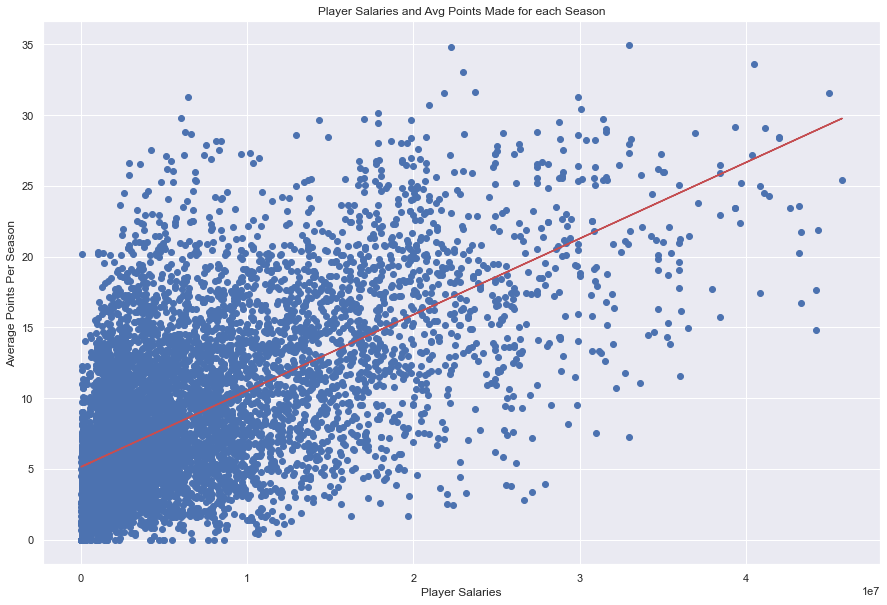

In [53]:
avg_df = df.groupby(['PLAYER_NAME', 'SEASON_START']).mean()

plt.figure(figsize=(15,10))
x = avg_df['INFLATION_ADJ_SALARY'].values
y = avg_df['PTS'].values
plt.scatter(x, y)
a,b = np.polyfit(x,y, 1)
plt.plot(x, a*x+b, 'r')
plt.xlabel('Player Salaries')
plt.ylabel('Average Points Per Season')
plt.title('Player Salaries and Avg Points Made for each Season')
plt.show()

We want a model that performs better than the best-fit line shown above. To establish a baseline, we calculate error metrics for this linear model:

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = avg_df[['PTS']]
y = avg_df['INFLATION_ADJ_SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2:', r2_score(y_test, y_pred))

MAE: 3735724.0211306093
MSE: 27864385041555.43
RMSE: 5278672.659064533
R2: 0.41077114593418884


### Other 2D plots of correlated features

<Figure size 1080x720 with 0 Axes>

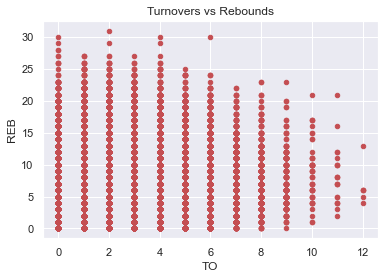

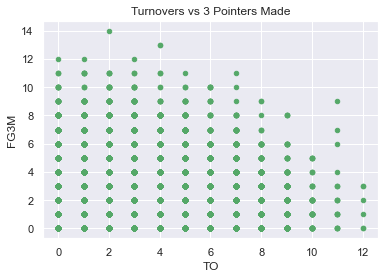

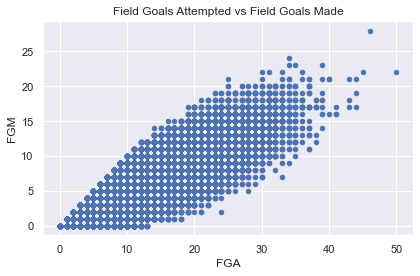

In [57]:
plt.figure(figsize=(15, 10))
ax1 = df.plot(kind='scatter', x='TO', y='REB', color='r')
# Slight correlation. A player that gets more rebounds will typically have less turnovers.
plt.title('Turnovers vs Rebounds')
ax2 = df.plot(kind='scatter', x='TO', y='FG3M', color='g')
# Slight correlation. A player that has less turnovers usually makes more 3 pointers.
plt.title('Turnovers vs 3 Pointers Made')
ax3 = df.plot(kind='scatter', x='FGA', y='FGM', color='b')
# strong correlation (obvious). A player that attempts more free throws makes more free throws.
plt.title('Field Goals Attempted vs Field Goals Made')

plt.tight_layout()
plt.show()